# Imports

In [69]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Loading data from directories

In [94]:
train_ds = image_dataset_from_directory(directory='training_data', label_mode='binary', seed=1927, validation_split=0.8, subset='training',batch_size=32)

test_ds = image_dataset_from_directory(directory='training_data', label_mode='binary', seed=1927, validation_split=0.2, subset='validation',batch_size=32)

Found 1203 files belonging to 2 classes.
Using 241 files for training.
Found 1203 files belonging to 2 classes.
Using 240 files for validation.


# Checking image size

In [41]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

# Creating Model

In [95]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(256,256,3), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=80, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(11,11)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_164 (Conv2D)         (None, 254, 254, 8)       224       
                                                                 
 conv2d_165 (Conv2D)         (None, 252, 252, 16)      1168      
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 126, 126, 16)     0         
 ng2D)                                                           
                                                                 
 batch_normalization_81 (Bat  (None, 126, 126, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_166 (Conv2D)         (None, 124, 124, 32)      4640      
                                                                 
 conv2d_167 (Conv2D)         (None, 122, 122, 48)    

# Adding optimizer, loss function and metrics to the model

In [96]:
model.compile(optimizer=RMSprop(learning_rate=5e-3, momentum=0.25), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model

In [97]:
history = model.fit(train_ds, validation_data=test_ds, epochs=120)

Epoch 1/120
8/8 [==============================] - 3s 215ms/step - loss: 0.6701 - accuracy: 0.5436 - val_loss: 0.7809 - val_accuracy: 0.4583
Epoch 2/120
8/8 [==============================] - 1s 104ms/step - loss: 0.5192 - accuracy: 0.7925 - val_loss: 0.7893 - val_accuracy: 0.4583
Epoch 3/120
8/8 [==============================] - 1s 102ms/step - loss: 0.3514 - accuracy: 0.9087 - val_loss: 0.7558 - val_accuracy: 0.5208
Epoch 4/120
8/8 [==============================] - 1s 105ms/step - loss: 0.2849 - accuracy: 0.9004 - val_loss: 1.4158 - val_accuracy: 0.4583
Epoch 5/120
8/8 [==============================] - 1s 102ms/step - loss: 0.2984 - accuracy: 0.8880 - val_loss: 1.4171 - val_accuracy: 0.4583
Epoch 6/120
8/8 [==============================] - 1s 103ms/step - loss: 0.3193 - accuracy: 0.8797 - val_loss: 1.2521 - val_accuracy: 0.5417
Epoch 7/120
8/8 [==============================] - 1s 103ms/step - loss: 0.2806 - accuracy: 0.9046 - val_loss: 1.4456 - val_accuracy: 0.4583
Epoch 8/120
8

# Evaluating trained model by test data

In [100]:
model.evaluate(test_ds, verbose=2)

8/8 - 0s - loss: 0.2645 - accuracy: 0.9500 - 486ms/epoch - 61ms/step


[0.26446446776390076, 0.949999988079071]

# Plotting the loss value and accuracy on both train and test data

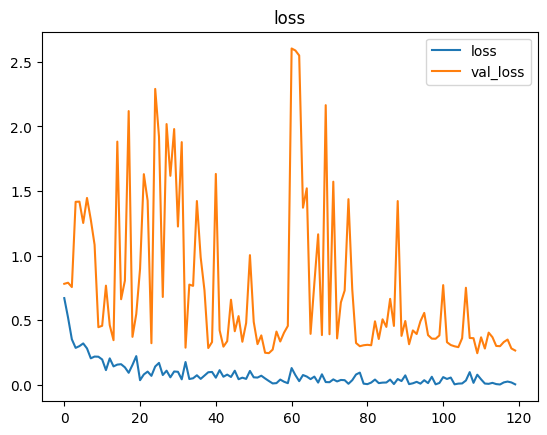

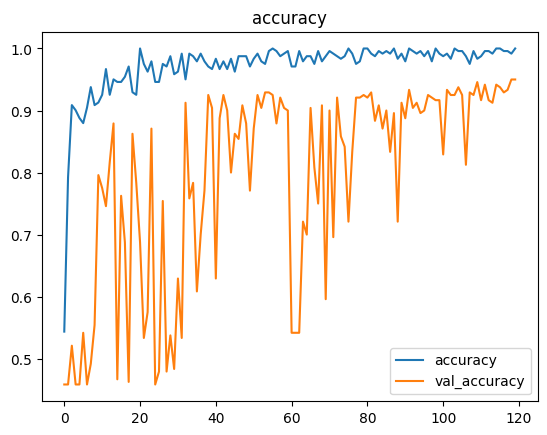

In [98]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('accuracy')
plt.show()